<a href="https://colab.research.google.com/github/ksimhadr/learn/blob/master/Python_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Logistic Regression

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
confusion_matrix
[[65  3]
 [ 8 24]]


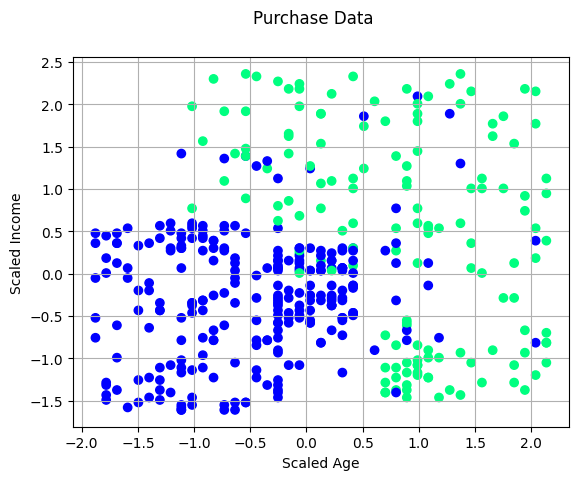

In [3]:
import pandas as pd #pandas datahandling library
from sklearn.model_selection import train_test_split #from sklearn ML library import train and test data splitting
from sklearn.metrics import confusion_matrix #to characterize performance metrics of logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #to scale the data for improved performance - PreProcessing step
#why we need this?
##Centralize the data (centered around 0) with variance = 1 and scale the data to same scale
import matplotlib.pyplot as plt #for plotting
import numpy as np #Used for numerical operations and array manipulations.

#Sigmoid Function or Logistic Function
#Maps any real-valued number into the range [0, 1], representing probabilities.
def sigmoid(x):
  return 1/(1 + np.exp(-x))

#Derivative of Sigmoid Function

#Describe Dataset - Purchase Dataset
#The dataset contains features (e.g., age, salary) and a target variable (e.g., purchased or not).
purchase_data = pd.read_csv('/content/Purchase_Logistic.csv')
print(purchase_data)

#X is input/feature and Y is response/output
X = purchase_data.iloc[:,[2,3]].values #Features - Age and Salary
Y = purchase_data.iloc[:,4].values #Target - Purchased Yes/No

#scale dataset
#Standardizes the features (mean = 0, variance = 1) to ensure all features are on the same scale.
#Standardizes the features to have a mean of 0 and a variance of 1.
scaler = StandardScaler(); #Standardize features by removing the mean and scaling to unit variance

#Ensures that all features are on the same scale, improving model performance.
X = scaler.fit_transform(X); #Scale input data To Bring Age and Salary on same scale

#split data into test and train components
#75% of the data is used for training, and 25% is used for testing.

#why random state = 0:
#to understand the performance variation due to each run or with the randomness
#random_state=0 ensures reproducibility.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

#apply logistic regression
logr = LogisticRegression(random_state = 0)

#Fit Logistic regression for the training data
#The model learns the relationship between the features (X_train) and the target (Y_train).
logr.fit(X_train, Y_train)

#predicts the test data
#Evaluates the model's performance on unseen data.
Y_pred = logr.predict(X_test)

#Confusion Matrix - to characterize the performance of metrics
#Shows the number of true positives, true negatives, false positives, and false negatives.
cm = confusion_matrix(Y_test, Y_pred)
print('confusion_matrix')
print(cm)

#plot true response
#Visualizes the distribution of the data.
plt.figure(1)
plt.scatter(X[:,0], X[:,1], c = Y, cmap = 'winter')
plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,'both')
plt.axis('tight')
plt.show()

In [4]:
#logr contains the parameters of the model - regression coeff and bias
#apply sigmoid function

#Purpose: Computes the predicted probabilities for each data point in X using the logistic regression model.
#Explanation:

#logr.coef_: The coefficients (weights) of the logistic regression model.
#logr.intercept_: The bias term (intercept) of the logistic regression model.

#np.dot(X, np.transpose(logr.coef_)):
#Computes the dot product of the input features (X) and the model coefficients.
#This gives the linear combination of the features.

#+ logr.intercept_: Adds the bias term to the linear combination.
#sigmoid(...): Applies the sigmoid function to the result, converting it into a probability value between 0 and 1.

#Output: col contains the predicted probabilities for each data point in X.
col = sigmoid(np.dot(X,np.transpose(logr.coef_)) + logr.intercept_)

#logr.coef_ is a 2D array where each row corresponds to the coefficients for each class
 #(in binary classification, there is only one row).
#For example, if the model has two features (e.g., age and salary),
#cf will be a 1x2 array like [[coef_age, coef_salary]].
cf = logr.coef_;
#np.arange(-1, 1.2, 0.01) creates an array of values from -1 to 1.2 with a step size of 0.01.
#These values represent the scaled values of the first feature (e.g., scaled age).
x1 = np.arange(-1,1.2,0.01) #step size 0.01

#The decision boundary is the line where the probability of the positive class is 0.5
#(i.e., the logistic function equals 0.5).

#cf[0][0] is the coefficient for the first feature (x1).
#cf[0][1] is the coefficient for the second feature (x2).
#logr.intercept_ is the bias term.

#x2 is normalized salary for each age such that prob of purchase or response is 1/2
x2 = -(cf[0][0]*x1 + logr.intercept_)/cf[0][1] #x2 = -(h1x1 + h0)/h2

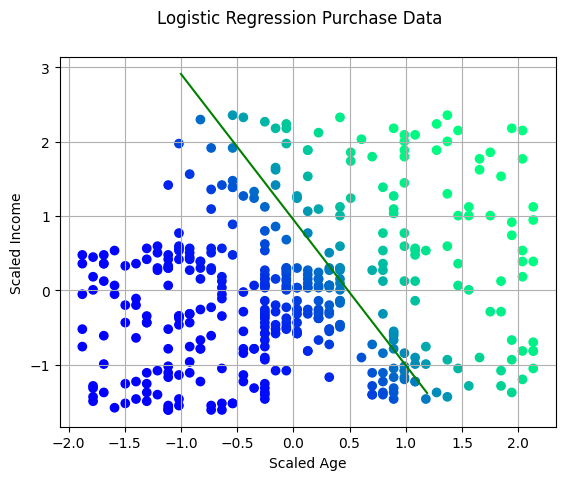

In [6]:
#plot the predicted response
plt.figure(2)
plt.scatter(X[:,0],X[:,1],c=col,cmap = 'winter')
plt.plot(x1,x2,color = 'green')
plt.suptitle('Logistic Regression Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,'both')
plt.axis('tight')
plt.show()